# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw2_123456789_987654321.ipynb` if you submitted in pairs and `hw2_123456789.ipynb` if you submitted the exercise alone.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
1. Your code must run without errors. Make sure your `numpy` version is at least 1.15.4 and that you are using at least python 3.6. Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

# I have read and understood the instructions: *** YOUR ID HERE ***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x1d2a4b675e0>, <__main__.Node at 0x1d2a4b67790>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [4]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')
type(data)

pandas.core.frame.DataFrame

In [5]:
data.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4182


In [6]:
#this block is for tests
df = pd.DataFrame({'A': [1, 2, 3], 
                   'B': [1, 2, np.nan], 
                   'C': [4, 5, 6], 
                   'D': [np.nan, np.nan, np.nan]})
missing_values = df.columns[df.isnull().any()].tolist() #crate a list of all the columns with missing values
#B = df.copy
#print(missing_values)
for miss in missing_values:
  df.drop(miss,inplace=True, axis=1)  #delete al the columns with missung values from df

values, counts = np.unique(df, return_counts=True)
Ssize = df.shape[0]
print(values)
values = values/3
print(values)
print(counts)
SumSquerdPropability = np.square((values/6))
print(SumSquerdPropability)
print(sum(SumSquerdPropability))





[1 2 3 4 5 6]
[0.33333333 0.66666667 1.         1.33333333 1.66666667 2.        ]
[1 1 1 1 1 1]
[0.00308642 0.01234568 0.02777778 0.04938272 0.07716049 0.11111111]
0.2808641975308642


One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [7]:
#############################################################################
# TODO: Find columns with missing values and remove them from the data.#
#############################################################################

# Create a list of all the culomns in the data that have missing values
MissingValueColumns = data.columns[data.isnull().any()].tolist()

#remove all the culomns with missing values from data
for column in MissingValueColumns:
    data.drop(column ,inplace=True, axis=1)

#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

In [8]:
data.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4182


We will split the dataset to `Training` and `Testing` datasets.

In [9]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


In [10]:
y.shape

(8124,)

## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation (10 points).

In [11]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    #Ssize = the numbers of elements in the data 
    Labelscolumn = data[:,data.shape[1] -1]
    Ssize = data.shape[0]
    #print(Ssize)
    
    #The uniqe function return 2 values 
    #SI is an array that has the all the differnt values "names"
    #SIsize is an array with the corespondig size of for each "group"(element) in SI 
    SI, SIsize = np.unique(Labelscolumn, return_counts=True)
    #print(SIsize)

    
    #divide all the elemnt in SIsize with the constant Ssize
    SIdevidebyS = SIsize/Ssize
    
    #return the sum of the squerd propabilitis of the elemnt in SI
    SumSquerdPropability = sum(np.square(SIdevidebyS))
    
    #After we made the sum of (|SI|/|S|), the last part is: 1 - SumSquerdPropability 
    
    gini = 1 - SumSquerdPropability 
    
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [12]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    #Ssize = the numbers of elements in the data 
    Labelscolumn = data[:,data.shape[1]-1]
    Ssize = data.shape[0]
    
    #The uniqe function return 2 values 
    #SI is an array that have the all the differnt values "names"
    #SIsize is an array with the corespondig size of for each "group"(element) in SI 
    SI, SIsize = np.unique(Labelscolumn, return_counts=True)
    
    
    #divide all the elemnt in SIsize with the constant Ssize
    SIdevidebyS = SIsize/Ssize
    
    #return an arry with log(|SI|\|S|)
    LogSIdevidebyS = (np.log2(SIdevidebyS))
    
    #entropy = -SUM((|SI|\|S|)\(log(|SI|\|S|))
    
    entropy = (-1) * sum(np.multiply(SIdevidebyS,LogSIdevidebyS))
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy

In [13]:
##### Your Tests Here #####
calc_gini(X), calc_entropy(X)

(0.4995636322379775, 0.9993703627906085)

## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch). (10 Points)

In [14]:
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns the goodness of split (or the Gain Ration).  
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    #check for the correct impurity function to use
    if gain_ratio:  
        impurity_func = calc_entropy
    
    feature_column = data[:,feature] #the column of the feature
    
    #count the number of each uniqe value in the given feature culomn
    unique_values, count = np.unique(feature_column, return_counts=True)
    
    total_instances = data.shape[0] #the size of S 
    
    #create a vector of the impurity of each sub array after spliting
    impurity_by_unique_values = [impurity_func(data[feature_column == value]) for value in unique_values]

    # calculate the sum of the impurity of the children (we multipaly the count vectoer wite the impurity vector)
    sum_children_impurity = np.sum(count * np.array(impurity_by_unique_values))/total_instances
    goodness =  impurity_func(data) - sum_children_impurity
    
    if gain_ratio:
        information_gain = goodness 
        feature_propabilities = count/total_instances
        split_information = -np.sum(feature_propabilities * np.log2(feature_propabilities))
        goodness = information_gain / split_information
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return goodness

## Building a Decision Tree

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points)

In [15]:
class DecisionNode:
    """
    This class will hold everything you require to construct a decision tree.
    The structure of this class is up to you. However, you need to support basic 
    functionality as described above. It is highly recommended that you 
    first read and understand the entire exercise before diving into this class.
    """
    """
    - featue: the current feature the node has bin split by
    - data: the data after being split by that same feature
    - impurity: the impurity function given
    - gain_ratio: goodness of split or gain ratio flag
    - current_deapth: the current depth of the node
    - children: list of children created when impurity is not 0 and 
    - value: the value at current feature of this specific node
    
    """
    def __init__(self, data, feature, value, goodness, impurity, list_of_path_features, gain_ratio=False, current_depth=0):
        self.feature = feature # the feature column index it will split by
        self.data = data # the data given to the decision node after
        self.goodness = goodness
        self.impurity_func = impurity # impurity function to be used
        self.gain_ratio = gain_ratio # boolean that defines if to return gain_ratio or goodness of split as split paramiter
        self.children = [] # only filled when epxand_or_finnish is called
        self.value = value # the value that was split by
        self.current_depth = current_depth
        self.impurity = self.impurity_func(self.data) # get impurity of current 
        self.list_of_path_features = list_of_path_features

        #implamnted for prediction
        self.pred = self.get_favored_label_value()

    def add_child(self, Dec_node):
        self.children.append(Dec_node)

    def get_favored_label_value(self): # returns favored label value
        current_label_data = self.data[:,(self.data.shape[1]-1)] # get label column from current_data
        unique, pos = np.unique(current_label_data, return_inverse = True)
        counts = np.bincount(pos)
        maxpos = counts.argmax()
        return(unique[maxpos])


    def count_children(self):
        if len(self.children) == 0: 
            return 1
        else:
            return 1 + sum([child.count_children() for child in self.children])
    
    def __str__(self):
        return f"I am a node at {self.current_depth} depth, my goodness is {self.goodness} , my value is {self.value} and I am split on feature {self.feature}"
    

In [16]:

def get_current_best_feature(data, impurity_func, list_of_used_features ,gain_ratio=False): # returns feature index with best goodnes_of split based on current data and list_of_path-features 
    count = 0
    best_spliting_feature, max_goodness = -1, -1
    for value in list_of_used_features:
        if value == False:
            temp_goodness = goodness_of_split(data, count, impurity_func, gain_ratio)
            if temp_goodness > max_goodness:
                max_goodness = temp_goodness
                best_spliting_feature = count
        count +=1
    return best_spliting_feature, max_goodness
    
def get_values_by_feature(data, feature): # returns list unique of values by feature index on data
    return np.unique(data[:,feature])
    
def get_data_by_feature_value(data, feature, value): # returns data where on column feature every row is equal to value
    sub_data = data[data[:,feature] == value]
    return sub_data
    

def build_tree(data, impurity, gain_ratio=False, min_samples_split=1, max_depth=1000):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag
    - min_samples_split: the minimum number of samples required to split an internal node
    - max_depth: the allowable depth of the tree

    Output: the root node of the tree.
    """

    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    list_of_path_features = [False for x in range(0,data.shape[1]-1) ] # create a list of feature indecease where the path to current node was to not check twice
    first_feature, first_goodness = get_current_best_feature(data, impurity, list_of_path_features) # get feature for root
    root = DecisionNode(data, first_feature, None, first_goodness, impurity, list_of_path_features ) # NODE CREATION HERE
    queue = [root]
    while len(queue) > 0:
        current_node = queue.pop(0) # pop first node
        current_node.list_of_path_features[current_node.feature] = True
        
        
        # check parmiters for leaf: data > min-sample_split, more than only one split value, depth < max_depth and current_node.goodness > 0
        if current_node.data.shape[0] > min_samples_split  and current_node.goodness > 0 and current_node.current_depth < max_depth:
            # after check this is not a leaf
            # update list_of_path_features
            current_values = get_values_by_feature(current_node.data, current_node.feature)
            if len(current_values) !=1:
                for value in current_values:
                    updated_feature_path = current_node.list_of_path_features.copy()
                    sub_data = get_data_by_feature_value(current_node.data, current_node.feature, value) # sub data where all rows are value at feature
                    sub_feature, sub_goodness = get_current_best_feature(sub_data, impurity, current_node.list_of_path_features, gain_ratio) # get best feature for current sub_data
                    sub_node = DecisionNode(sub_data, sub_feature, value, sub_goodness, impurity, updated_feature_path, gain_ratio, (current_node.current_depth + 1))
                    current_node.add_child(sub_node)
                    queue.append(sub_node)
                
            # split data, find best features for sub data, create nodes by that feature and data and add to queue and children list of current_node
        #print(current_node)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return root

In [17]:
# python supports passing a function as an argument to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

In [18]:
print(tree_gini.count_children())
print(tree_entropy.count_children())
print(tree_entropy_gain_ratio.count_children())

3231
3227
2447


In [19]:
#testing
test_tree = build_tree(X_train, calc_gini, min_samples_split=5)

## Tree evaluation

Complete the functions `predict` and `calc_accuracy`. (10 points)

In [20]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    pred = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    while len(node.children) > 0:
        for child_node in node.children: # iterate over all children to find matching child in path
            given_value = instance[node.feature] # the value of the feature in the current row
            node_value = child_node.value # the value of the child
            if given_value == node_value: # each instance is a 1dim np.array
                node = child_node # change pointer to next node in path
                break
        else:
            break           
                

    

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return node.pred

In [21]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated

    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    #to caclculate accuracy we need to find how much instances we need to find true A true B false A and false B
    #the accuracy will be (true_A +true_B)/(true_A + true_B + false_A + false_B) = true / all
    true_predictions = 0
    number_of_instances = dataset.shape[0]
    
    
    #calculate the predict value for every instance in the data set
    for instance in dataset:
        #if the prediction == real label we need to add 1 to the true_prediction counter
        if predict(node,instance) == instance[-1]:
            true_predictions  += 1 # add one to correct prediction
        
        
    
    accuracy = true_predictions/ number_of_instances
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy 

In [22]:
calc_accuracy(test_tree, X_train)


0.9161332676842278

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [42]:
#### Your code here ####
tree_gini_test_accuricy = calc_accuracy(tree_gini, X_test)
tree_gini_train_accuricy = calc_accuracy(tree_gini, X_train)

print("tree_gini accuracy statistics:")
print()
print(f"X_train accuracy: {tree_gini_train_accuricy}")
print(f"X_test accuracy: {tree_gini_test_accuricy}")
print()
print()

tree_entropy_test_accuricy = calc_accuracy(tree_entropy, X_test)
tree_entropy_train_accuricy = calc_accuracy(tree_entropy, X_train)

print("tree_entropy accuracy statistics:")
print()
print(f"X_train accuracy: {tree_entropy_train_accuricy}")
print(f"X_test accuracy: {tree_entropy_test_accuricy}")
print()
print()

tree_entropy_gain_ratio_test_accuricy = calc_accuracy(tree_entropy_gain_ratio, X_test)
tree_entropy_gain_ratio_train_accuricy = calc_accuracy(tree_entropy_gain_ratio, X_train)

print("tree_entropy_gain_ratio accuracy statistics:")
print()
print(f"X_train accuracy: {tree_entropy_gain_ratio_train_accuricy}")
print(f"X_test accuracy: {tree_entropy_gain_ratio_test_accuricy}")
print()
print()



tree_gini accuracy statistics:

X_train accuracy: 0.9924503528639422
X_test accuracy: 0.7749876907927129


tree_entropy accuracy statistics:

X_train accuracy: 0.9940915805022157
X_test accuracy: 0.7725258493353028


tree_entropy_gain_ratio accuracy statistics:

X_train accuracy: 0.971278516330215
X_test accuracy: 0.8079763663220089




## Depth pruning

(15 points)

Consider the following max_depth values: [1, 2, 3, 4, 5, 6, 7, 8]. For each value, construct a tree and prune it according to the max_depth value = don't let the tree to grow beyond this depth. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the max_depth. Mark the best result on the graph with red circle.

In [43]:
#### Your code here ####

test_accuracy=[]
train_accuracy =[]
best_depth = 0
best_accuracy = 0

#create the list of accuracies for the train and the test
for i in range(1,9):
    tree = build_tree(X_train,calc_entropy,True, max_depth=i)
    current_test_acc = calc_accuracy(tree,X_test)
    current_train_acc = calc_accuracy(tree,X_train)
    test_accuracy.append(current_test_acc)
    train_accuracy.append(current_train_acc)
    if current_test_acc > best_accuracy:
        best_accuracy = current_test_acc
        best_depth = i
    print(f"for max depth = {i} the train_accuracy = {current_train_acc} and the test_accuracy = {current_test_acc}\n" )
    




for max depth = 1 the train_accuracy = 0.8885606433612342 and the test_accuracy = 0.8852781880846874

for max depth = 2 the train_accuracy = 0.8885606433612342 and the test_accuracy = 0.8852781880846874

for max depth = 3 the train_accuracy = 0.8964385360249466 and the test_accuracy = 0.8931560807483998

for max depth = 4 the train_accuracy = 0.901854587231249 and the test_accuracy = 0.8956179222058099

for max depth = 5 the train_accuracy = 0.9026752010503857 and the test_accuracy = 0.8902018709995076

for max depth = 6 the train_accuracy = 0.9056294107992778 and the test_accuracy = 0.8788774002954209

for max depth = 7 the train_accuracy = 0.913343180699163 and the test_accuracy = 0.8601674052191038

for max depth = 8 the train_accuracy = 0.9218775644181848 and the test_accuracy = 0.8513047759724274



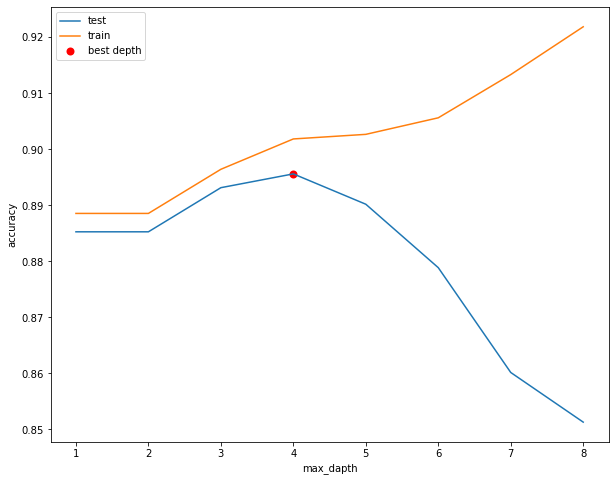

In [44]:
depth = list(range(1,9))
plt.plot(depth, test_accuracy ,label = "test")
plt.plot(depth,train_accuracy,label = "train")
plt.scatter(x=best_depth, y=best_accuracy, linewidths= 2, label= "best depth", c='r')
plt.legend()
    
    
plt.xlabel("max_dapth") 
plt.ylabel("accuracy")  

plt.show()

## Min Samples Split

(15 points)

Consider the following min_samples_split values: [1, 5, 10, 20, 50]. For each value, construct a tree and prune it according to the min_samples_split value = don't split a node if the number of sample in it is less or equal to the min_samples_split value. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the min_samples_split. Mark the best result on the graph with red circle. (make sure that the x-axis ticks represent the values of min_samples_split)

In [46]:
#### Your code here ####
list_of_splits = [1, 5, 10, 20, 50]
test_accuracy=[]
train_accuracy =[]
best_split = 0
best_accuracy = 0

#create the list of accuracies for the train and the test
for i in list_of_splits:
    tree = build_tree(X_train,calc_entropy,True, min_samples_split=i)
    current_test_acc = calc_accuracy(tree,X_test)
    current_train_acc = calc_accuracy(tree,X_train)
    test_accuracy.append(current_test_acc)
    train_accuracy.append(current_train_acc)
    if current_test_acc > best_accuracy:
        best_accuracy = current_test_acc
        best_split = i
    print(f"for min_samples_split = {i} the train_accuracy = {current_train_acc} and the test_accuracy = {current_test_acc}\n" )

for min_samples_split = 1 the train_accuracy = 0.971278516330215 and the test_accuracy = 0.8079763663220089

for min_samples_split = 5 the train_accuracy = 0.9158050221565731 and the test_accuracy = 0.844411619891679

for min_samples_split = 10 the train_accuracy = 0.9038240603971771 and the test_accuracy = 0.880354505169867

for min_samples_split = 20 the train_accuracy = 0.9020187099950763 and the test_accuracy = 0.8906942392909897

for min_samples_split = 50 the train_accuracy = 0.9016904644674216 and the test_accuracy = 0.8951255539143279



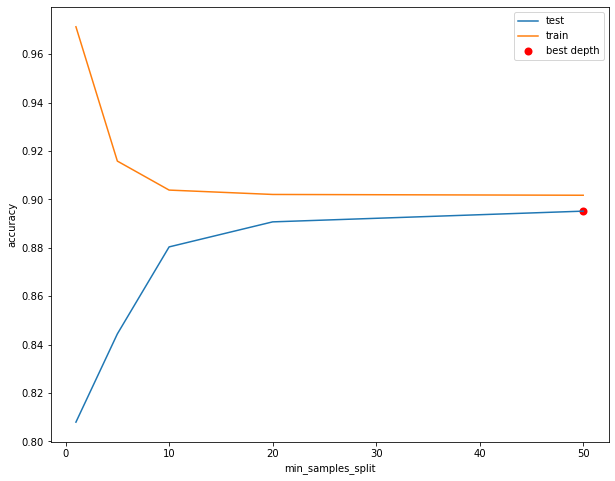

In [48]:
list_of_splits = [1, 5, 10, 20, 50]
plt.plot(list_of_splits, test_accuracy ,label = "test")
plt.plot(list_of_splits, train_accuracy,label = "train")
plt.scatter(x=best_split, y=best_accuracy, linewidths= 2, label= "best depth", c='r')
plt.legend()
    
    
plt.xlabel("min_samples_split") 
plt.ylabel("accuracy")  

plt.show()

Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_min_samples_split - the best tree according to min_samples_split pruning

In [28]:
#### Your code here ####
tree_max_depth = build_tree(X_train,calc_entropy,True, max_depth = 4)
tree_min_sample_split = build_tree(X_train,calc_entropy,True,min_samples_split = 50)

## Number of Nodes

(5 points)

Complete the function counts_nodes and print the number of nodes in each tree and print the number of nodes of the two trees above

In [29]:
def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    return node.count_children()
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    

In [30]:
print(f"The number of nodes in tree_max_depth is {count_nodes(tree_max_depth)}")
print(f"The number of nodes in tree_min_sample_split is {count_nodes(tree_min_sample_split)}")

The number of nodes in tree_max_depth is 155
The number of nodes in tree_min_sample_split is 317


## Print the tree

Complete the function `print_tree`. Your tree should be visualized clearly. You can use the following example as a reference:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
    [X5=a, leaf]: [{1.0: 5}]
    [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

(5 points)

In [31]:
def get_tuples_of_labels(node:DecisionNode):
    vals, frequency = np.unique(node.data[:,-1], return_counts=True)
    return list(zip(vals, frequency))


In [32]:
#test
print(get_tuples_of_labels(tree_max_depth))

[('e', 3154), ('p', 2939)]


In [33]:
# you can change the function signeture
def print_tree(node, parent_feature='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    if len(node.children) > 0: # if node  is not a leaf print its value and proceed to its children
        print(f"{' '*node.current_depth}[{parent_feature}, feature = X{node.feature}],")
        for child_node in node.children:
            print_tree(child_node, node.feature) #print each child
    else:
       print(f"{' '*node.current_depth}[{parent_feature}, leaf]: [{get_tuples_of_labels(node)}]") 

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

In [34]:
#base on the following guidlines test_tree here has the best accuracy based on both pruning methods and limitations of node number 
test_tree = build_tree(X_train, calc_entropy, gain_ratio=True, min_samples_split=225, max_depth=4)
print(f"The number of nodes in test_tree is {count_nodes(test_tree)} and its accuracy on the test set is {calc_accuracy(test_tree, X_test)}")


The number of nodes in test_tree is 46 and its accuracy on the test set is 0.8931560807483998


print the tree with the best test accuracy and with less than 50 nodes (from the two pruning methods)

In [35]:
#### Your code here ####
print_tree(test_tree)

[ROOT, feature = X4],
 [4, feature = X2],
  [2, leaf]: [[('e', 33), ('p', 5)]]
  [2, leaf]: [[('e', 107), ('p', 7)]]
  [2, leaf]: [[('e', 133), ('p', 19)]]
 [4, leaf]: [[('e', 10), ('p', 137)]]
 [4, feature = X10],
  [10, leaf]: [[('e', 14), ('p', 91)]]
  [10, feature = X11],
   [11, feature = X7],
    [7, leaf]: [[('e', 112), ('p', 854)]]
    [7, leaf]: [[('e', 6), ('p', 97)]]
   [11, leaf]: [[('e', 16), ('p', 86)]]
  [10, feature = X19],
   [19, leaf]: [[('e', 2), ('p', 55)]]
   [19, feature = X11],
    [11, leaf]: [[('e', 4), ('p', 24)]]
    [11, leaf]: [[('e', 6), ('p', 107)]]
    [11, leaf]: [[('e', 10), ('p', 124)]]
 [4, leaf]: [[('e', 272), ('p', 27)]]
 [4, leaf]: [[('e', 2), ('p', 25)]]
 [4, feature = X7],
  [7, feature = X18],
   [18, leaf]: [[('e', 34), ('p', 2)]]
   [18, feature = X11],
    [11, leaf]: [[('e', 126), ('p', 19)]]
    [11, leaf]: [[('e', 717), ('p', 74)]]
   [18, feature = X15],
    [15, leaf]: [[('e', 14), ('p', 4)]]
    [15, leaf]: [[('e', 18), ('p', 1)]]
   